In [1]:
import autosklearn.regression
from joblib import dump
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, spearmanr
import sklearn
from skmisc.loess import loess
from sklearn.model_selection import KFold, train_test_split
import sys
sys.path.insert(0,'..')
from ml import *

/Users/luciomelito/opt/anaconda3/envs/cider2/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
learner = Learner(cfg_dir='../configs/config_lucio.yml')
learner.merge()

21/07/14 21:32:30 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
21/07/14 21:32:31 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
21/07/14 21:32:31 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


Number of observations with features: 1000 (1000 unique)
Number of observations with labels: 1000 (1000 unique)
Number of matched observations: 1000 (1000 unique)


In [3]:
learner.automl(model_name='automl')

[WARNING] [2021-07-14 21:34:23,983:Client-EnsembleBuilder] No models better than random - using Dummy loss!Number of models besides current dummy model: 1. Number of dummy models: 1
[WARNING] [2021-07-14 21:34:28,334:Client-EnsembleBuilder] No models better than random - using Dummy loss!Number of models besides current dummy model: 1. Number of dummy models: 1
[WARNING] [2021-07-14 21:34:34,452:Client-EnsembleBuilder] No models better than random - using Dummy loss!Number of models besides current dummy model: 2. Number of dummy models: 1
[WARNING] [2021-07-14 21:34:41,608:Client-EnsembleBuilder] No models better than random - using Dummy loss!Number of models besides current dummy model: 3. Number of dummy models: 1
[WARNING] [2021-07-14 21:34:43,776:Client-EnsembleBuilder] No models better than random - using Dummy loss!Number of models besides current dummy model: 4. Number of dummy models: 1
[WARNING] [2021-07-14 21:36:17,279:Client-EnsembleBuilder] No models better than random - 

In [4]:
predictions = learner.oos_predictions('autosklearn', type='automl')

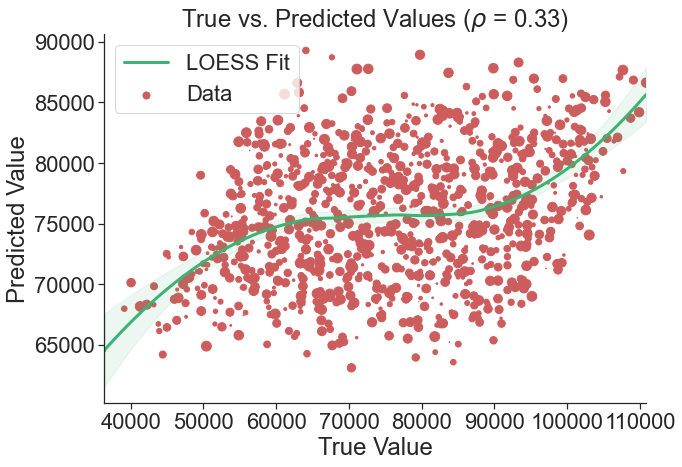

In [5]:
learner.scatter_plot('autosklearn', type='automl')

In [6]:
learner.targeting_table('autosklearn', type='automl')

,Proportion of Population Targeted,Pearson,Spearman,AUC,Accuracy,Precision,Recall
0,10%,0.33,0.31,0.65,84%,20%,20%
1,20%,0.33,0.31,0.65,71%,29%,29%
2,30%,0.33,0.31,0.65,64%,40%,40%
3,40%,0.33,0.31,0.65,62%,52%,52%
4,50%,0.33,0.31,0.65,60%,60%,60%
5,60%,0.33,0.31,0.65,59%,66%,66%
6,70%,0.33,0.31,0.65,66%,75%,75%
7,80%,0.33,0.31,0.65,74%,83%,83%
8,90%,0.33,0.31,0.65,86%,92%,92%
